In [1]:
# importing all required pakages and libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
import xgboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
sb.set()

### EDA and Data-preprocessing

In [2]:
ds = pd.read_csv('baseball.csv')
ds.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Here, we have very small dataset to analyse, and by seeing the difference between 75% and 25% percentile with max and min values, we dont expect to see much outliers, also the difference between mean and median of most features is not large enough, so we might see less skewed data. 

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are 16 numeric columns, out of which we shall predict number of wins 'W'(which makes this as a regression problem), and there are no null values.

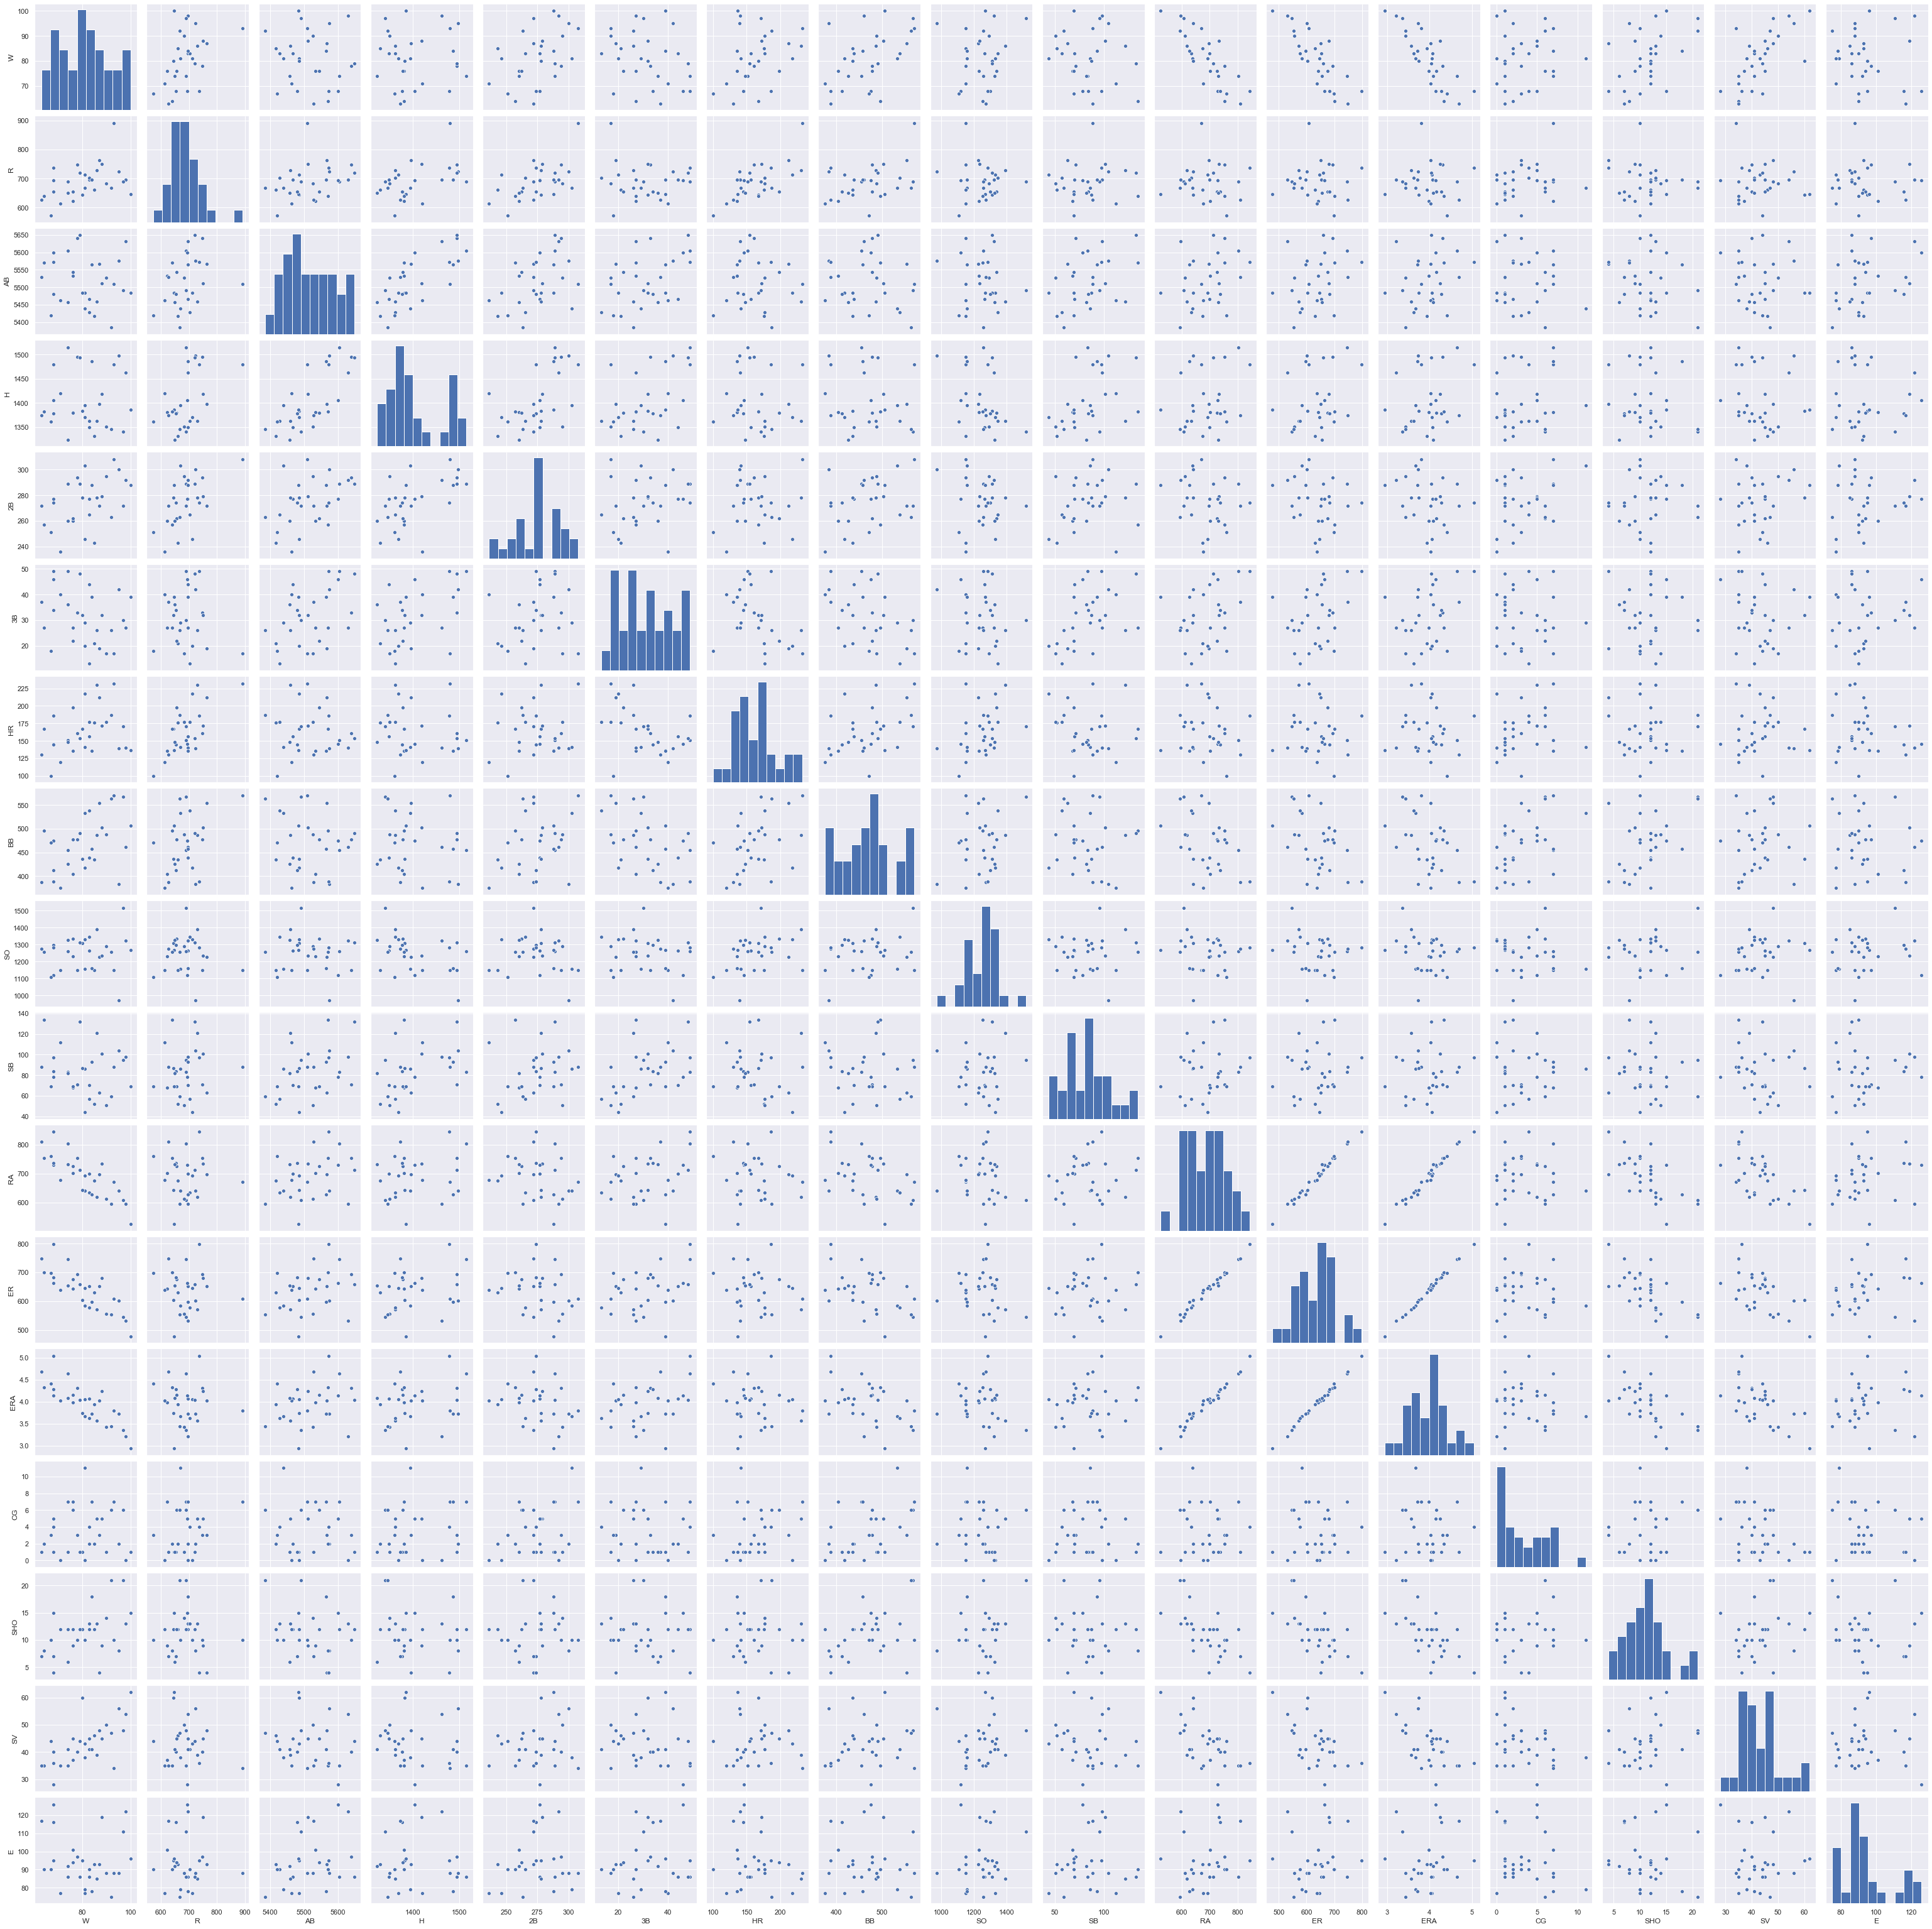

In [5]:
sb.pairplot(ds)

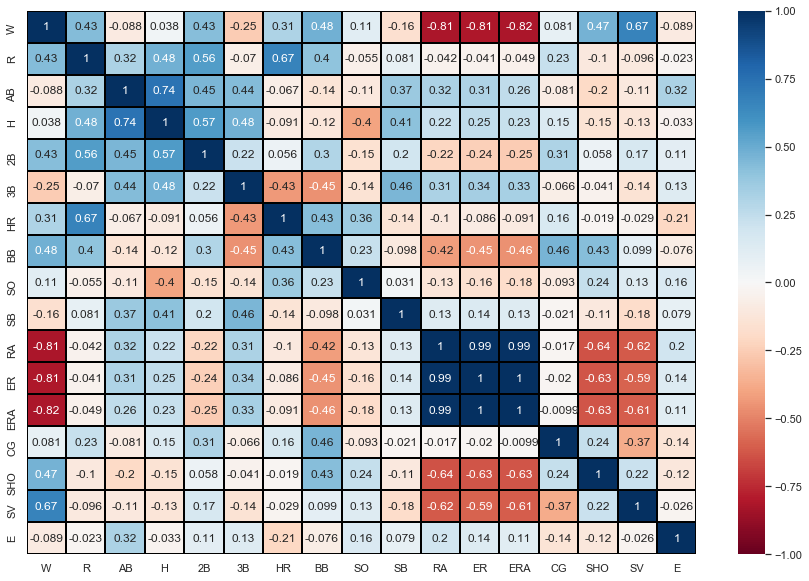

In [6]:
plt.figure(figsize = (15,10))
sb.heatmap(ds.corr(), vmin = -1, vmax = 1, center = 0, cmap = 'RdBu',
          linewidth =1, linecolor = 'black', annot = True)

We can see, that features like  Runs Allowed(RA), Earned Runs (ER), Earned Run Average (ERA) are highly  negatively corellated to number of wins(W), so these features are significant in determining the result of the game.

Whereas, features like Runs(R), Doubles(2B), Homeruns(HR), Walks(BB), Shutouts(SHO), Saves(SV) are moderately positively correlated with the target variable wins(W).

Also, the rest of the  features may be correlated with each other but not significantly correlated with the target variable.

We also see some skewed data form pairplot to which we shall log transform.

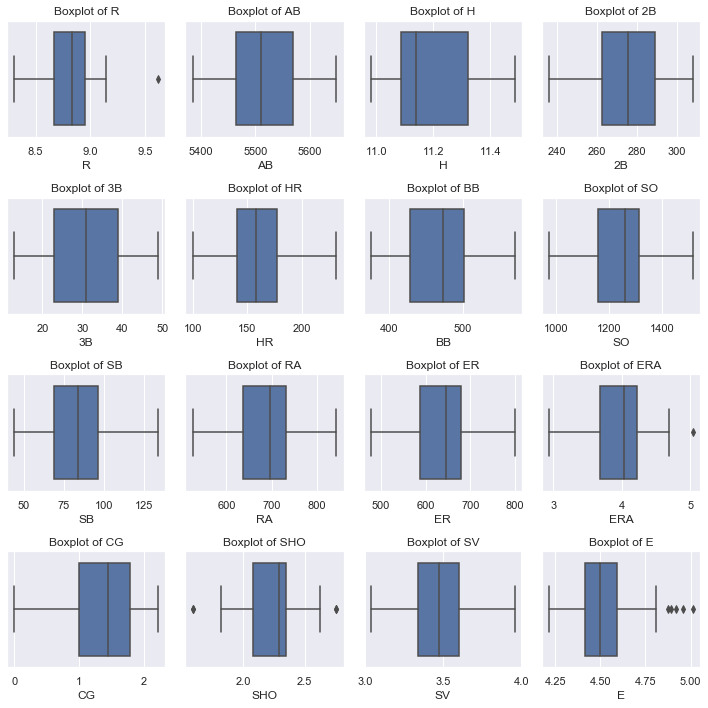

In [41]:
for i,col in enumerate(ds.columns[1:]):
    plt.subplot(4,4 ,i+1)
    sb.boxplot(ds[col])
    plt.title('Boxplot of ' + col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

Here, we see small no. of outliers, we shall remove it using 3 std from mean method (using zscore) and also use robust scaling methods like robust scaler as it scales data according to IQR of the data and usually robust to outliers. 

In [7]:
# cube root-transforming data
for col in ds.columns[1:]:
    if abs(ds[col].skew()) > 0.55:
        ds[col] = (ds[col])**(1/3)

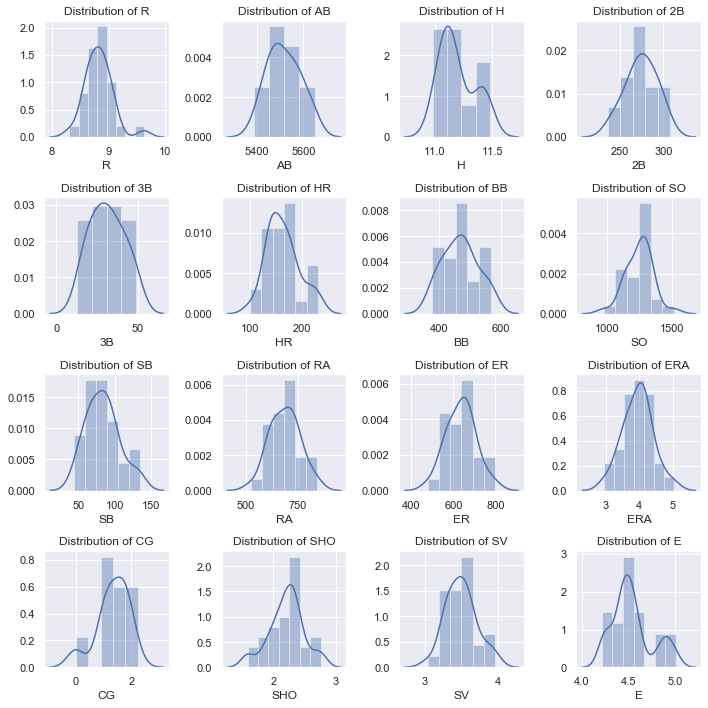

In [8]:
for i,col in enumerate(ds.columns[1:]):
    plt.subplot(4,4 ,i+1)
    sb.distplot(ds[col])
    plt.title('Distribution of '+col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

We can see from dist plot that most skewness of the data has been reduced to some extend after cube-root transform, which should be fine for linear models.

In [10]:
z = abs(zscore(ds))

In [11]:
# here we are using z threshold as 3 to filter out outliers.
ds_new = ds[(z<3).all(axis =1)]

In [12]:
print('no. of outliers removed:',ds.shape[0] - ds_new.shape[0])

no. of outliers removed: 1


In [14]:
# finding optimum random_state for the split of data into train-test.
r_state_score = []
for r_state in range(0,101):
    
    x_train, x_test, y_train, y_test = train_test_split(ds_new.drop('W',1), ds_new['W'],
                                                   test_size = 0.3, random_state = r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score = r2_score(y_test,y_pred)
    r_state_score.append(score)

print('optimum r2_score:',max(r_state_score),'corresponds to random sate:',
      r_state_score.index(max(r_state_score)))    

optimum r2_score: 0.8437144806768495 corresponds to random sate: 50


In [15]:
# here we use optimum random_state as 50 as found in above step.
x_train, x_test, y_train, y_test = train_test_split(ds_new.drop('W',1), ds_new['W'],
                                                   test_size = 0.3, random_state = 50)

In [17]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((20, 16), (9, 16), (20,), (9,))

In [18]:
# robust scaling x_train and using statistics of x_train to transform x_test as well.
for col in x_train.columns:
    transformer = RobustScaler().fit(x_train[col].values.reshape(-1,1))
    x_train[col] = transformer.transform(x_train[col].values.reshape(-1,1))
    x_test[col] = transformer.transform(x_test[col].values.reshape(-1,1))

###  Base Model Evaluation

model: RandomForestRegressor(random_state=42)
CV score:-10.222576159219956
score_std: 29.154999023471078
----------
model: LinearRegression()
CV score:-67.7711934433136
score_std: 106.62254470073202
----------
model: SVR()
CV score:-27.51911052054147
score_std: 75.69340900517963
----------
model: AdaBoostRegressor(random_state=42)
CV score:-13.899215642733122
score_std: 39.24473433200421
----------
model: GradientBoostingRegressor(random_state=42)
CV score:-12.698277191932435
score_std: 30.217950097438287
----------
model: KNeighborsRegressor()
CV score:-18.298230722609343
score_std: 50.12130313109248
----------
model: XGBRegressor(verbose=0)
CV score:-17.783429267225717
score_std: 52.8827659954878
----------
model: Lasso()
CV score:-6.748473952262439
score_std: 20.085260098932082
----------
model: Ridge()
CV score:-9.182775753059406
score_std: 23.05008908320481
----------
model: ElasticNet()
CV score:-9.121300752363206
score_std: 26.939293054489966
----------
model: DecisionTreeRegres

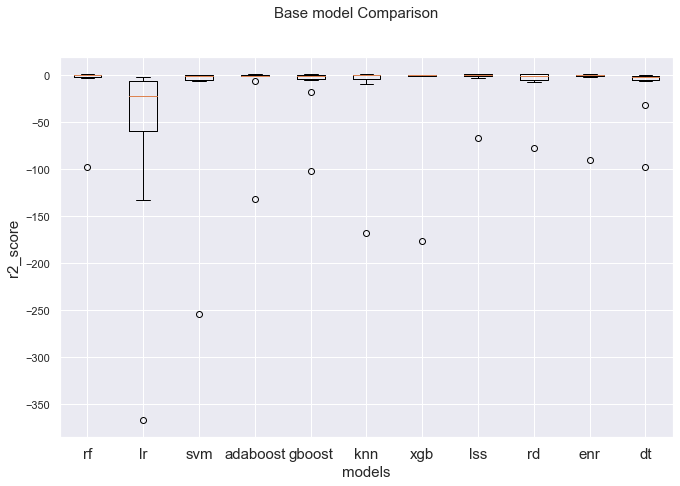

In [40]:
# initializing all models.
rf = RandomForestRegressor(random_state = 42)
svm = SVR()
lr = LinearRegression()
adaboost =  AdaBoostRegressor(random_state = 42)
gboost = GradientBoostingRegressor(random_state = 42)
knn = KNeighborsRegressor()
xgb = xgboost.XGBRegressor( verbose = 0)
lss = Lasso()
rd = Ridge()
enr = ElasticNet()
dt = DecisionTreeRegressor()


# computing cross-val-score for each model.
models = [rf, lr, svr, adaboost, gboost, knn, xgb, lss,rd,enr, dt]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = 10, scoring = 'r2', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 15)
plt.ylabel('r2_score', fontsize = 15)
plt.xlabel('models', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rf', 'lr','svm', 'adaboost', 'gboost', 'knn', 'xgb','lss','rd','enr','dt'],
                  fontsize = 15)
fig.set_size_inches(11,7)
plt.show() 

Here, after analysing the cross validation score of different models and since due to small dataset, all models over-fitted, hence poor cross-val-score.

It is worth noting that, the negative cross-val-score is due to high value of k-folds (cv = 10) implemented in the cross-val-score function, instead of the default (cv = 5), this is to address any overfitting in small dataset like this one.

It is also evident from the fact that the regularized linear models such as lasso, ridge or elasticnet performed better then the un-regularized simple linear regression model. This indicates  less cross-val-score and hence overfitting, so we shall further investigate the features and choose only relevant ones. 

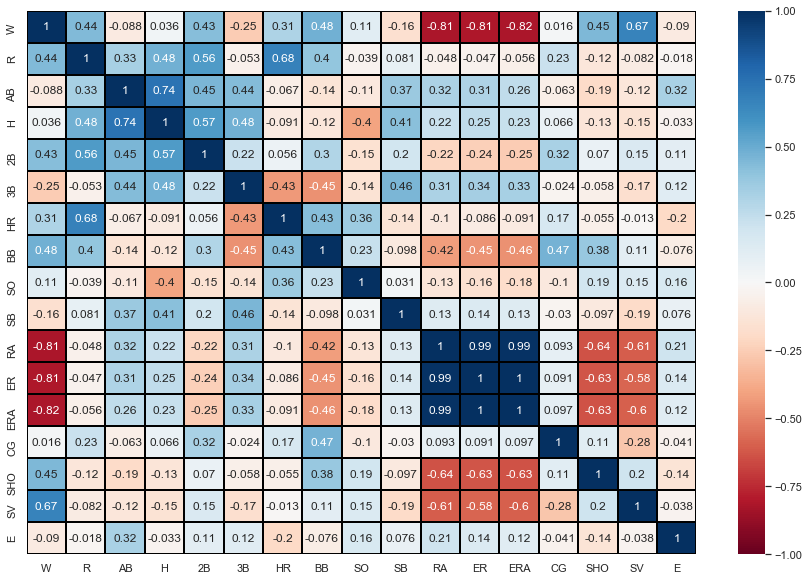

In [20]:
plt.figure(figsize = (15,10))
sb.heatmap(ds.corr(), vmin = -1, vmax = 1, center = 0, cmap = 'RdBu',
          linewidth =1, linecolor = 'black', annot = True)

From above, correlation heatmap, we choose features such that, they are highly correlated to our target variable 'W', and least correlated to each other. So, we pick 'SV','ERA','SHO' and 'R' as our features for modelling.

In [80]:
# selecting relevant features for modelling.
x_train_red =  x_train[['ERA','SV','R','SHO']]
x_test_red = x_test[['ERA','SV','R','SHO']]

### Model Evaluation after feature selection.

In [81]:
x_train_red

,ERA,SV,R,SHO
21,-1.000000,-0.284514,0.215238,0.314404
11,-1.131579,-0.520750,0.693228,0.314404
27,0.105263,0.055842,0.529075,0.000000
13,0.421053,0.165846,-0.679635,0.000000
3,-0.052632,-0.765206,-1.354001,-1.063203
24,1.815789,-1.018639,-1.273408,-1.912124
16,-2.078947,1.089432,0.103265,0.314404
8,-0.684211,1.649313,-0.914927,0.000000
2,-0.868421,-0.641906,-0.427952,-0.685596
22,0.052632,-1.018639,-1.536608,0.000000


model: RandomForestRegressor(random_state=42)
CV score:-7.74531852082214
score_std: 22.102113930378103
----------
model: LinearRegression()
CV score:-4.2100153370625275
score_std: 10.99468010653048
----------
model: SVR()
CV score:-22.66174209287284
score_std: 63.69988800873836
----------
model: AdaBoostRegressor(random_state=42)
CV score:-11.430639166810213
score_std: 32.08102182974424
----------
model: GradientBoostingRegressor(random_state=42)
CV score:-5.301249310944059
score_std: 10.719960158734796
----------
model: KNeighborsRegressor()
CV score:-10.623886257776231
score_std: 28.747778609841703
----------
model: XGBRegressor(verbose=0)
CV score:-6.739993387934935
score_std: 17.469613018004313
----------
model: Lasso()
CV score:-6.7364885390723614
score_std: 20.089107473177403
----------
model: Ridge()
CV score:-4.476300193770851
score_std: 12.522803139911927
----------
model: ElasticNet()
CV score:-9.519202870607192
score_std: 28.990050866502607
----------
model: DecisionTreeRegr

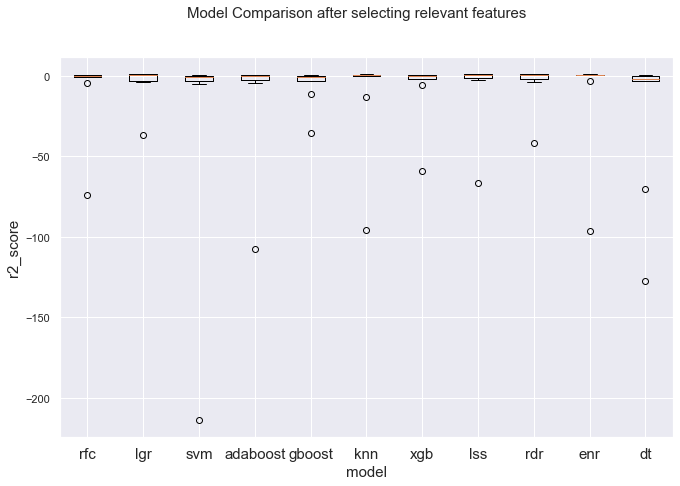

In [51]:
# computing cross-val-score for each model after feature selection.
models = [rfr, lr, svr, adaboost, gboost, knn, xgb, lss,rdr,enr,dt]

scores = []
for model in models:
    
    score = cross_val_score(model,x_train_red, y_train, cv = 10, scoring = 'r2', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Model Comparison after selecting relevant features', fontsize = 15)
plt.xlabel('model', fontsize = 15)
plt.ylabel('r2_score', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfc', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb','lss','rdr','enr','dt'],
                  fontsize = 15)
fig.set_size_inches(11,7)
plt.show() 

Here, after selecting relevant features, the simple linear regression model improves a lot and becomes less negative, this is also for other models as well.

Also, based on above cross-val-score we shall tune only rigde, gradientboost, and test the default linear regression model along with the tune ones.

###  Hyper-parameter tuning

In [82]:
param_gboost =  dict(
    learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
    n_estimators = [100, 150, 200],
    min_samples_split = [1,2,3])

param_rdr = dict(alpha = np.arange(0.05,2, 0.05), solver = ['svd', 
         'cholesky','lsqr','sparse_cg','sag','saga'])

In [83]:
model_param_list = [(rdr,param_rdr),(gboost,param_gboost)]

In [110]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    grid = GridSearchCV(model, param, cv = 10, n_jobs = -1, scoring = 'r2')
    
    grid.fit(x_train_red, y_train.values.ravel())
    best_cvscore = grid.best_score_
    best_param = grid.best_params_
    best_estimator = grid.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
print('best_estimators:',best_estimator_list)

model: Ridge()
best_cvscore: -4.355388365574489
best_param: {'alpha': 0.05, 'solver': 'sparse_cg'}


model: GradientBoostingRegressor(random_state=42)
best_cvscore: -4.332309168533214
best_param: {'learning_rate': 0.25, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


best_estimators: [Ridge(alpha=0.05, solver='sparse_cg'), GradientBoostingRegressor(learning_rate=0.25, random_state=42)]
Wall time: 32.8 s


###  Testing for train and test data

In [111]:
best_estimator_list.append(lr) # appending liner reg model to the list for testing.

In [114]:
# testing for train data

print('****TRAIN RESULTS****')
print('\n')

for model in best_estimator_list:
    model.fit(x_train_red, y_train)
    y_pred = model.predict(x_train_red)
    score = r2_score(y_train, y_pred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('root_mean_squared_error:',mean_squared_error(y_train, y_pred, squared = False))
    print('-------------------------------------------')

****TRAIN RESULTS****


model Ridge(alpha=0.05, solver='sparse_cg')
accuracy (r2_score): 88.49 %
root_mean_squared_error: 3.1522178671872227
-------------------------------------------
model GradientBoostingRegressor(learning_rate=0.25, random_state=42)
accuracy (r2_score): 100.0 %
root_mean_squared_error: 0.00011360279460525911
-------------------------------------------
model LinearRegression()
accuracy (r2_score): 88.49 %
root_mean_squared_error: 3.152179394501674
-------------------------------------------


In [115]:
#testing for test data
print('****TEST RESULTS****')
print('\n')
for model in best_estimator_list:
    model.fit(x_train_red, y_train)
    y_pred = model.predict(x_test_red)
    score = r2_score(y_test, y_pred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('root_mean_squared_error:',mean_squared_error(y_test, y_pred, squared = False))
    print('-------------------------------------------')

****TEST RESULTS****


model Ridge(alpha=0.05, solver='sparse_cg')
accuracy (r2_score): 92.77 %
root_mean_squared_error: 3.221571824683001
-------------------------------------------
model GradientBoostingRegressor(learning_rate=0.25, random_state=42)
accuracy (r2_score): 74.67 %
root_mean_squared_error: 6.029584854756958
-------------------------------------------
model LinearRegression()
accuracy (r2_score): 92.8 %
root_mean_squared_error: 3.213696670756273
-------------------------------------------


Based on the results of train and test data, we can conclude that complex, tree based and ensemble models like GradientBoost, XGBoost, etc. does not work optimum for small dataset like in this project, and tend to overfit the training set and does not generalize well on unseen/test data. However, the true capability of these powerful complex models shines well when we work with medium to large dataset.

And as for this project, we shall choose simple model like multiple linear regression model which performed better then the rest models.

In [123]:
test_df = pd.DataFrame({'Test/Actual Wins':y_test.values,'Predicted Wins':y_pred})
test_df

,Test/Actual Wins,Predicted Wins
0,68,66.950896
1,78,79.655040
2,74,75.345200
3,88,82.896356
4,68,73.011619
5,64,68.914833
6,92,88.815929
7,90,90.847005
8,100,98.938649


In [124]:
# rounding the predicted wins, as it can only be integers.
test_rounded_df = test_df.round()
test_rounded_df

,Test/Actual Wins,Predicted Wins
0,68,67.0
1,78,80.0
2,74,75.0
3,88,83.0
4,68,73.0
5,64,69.0
6,92,89.0
7,90,91.0
8,100,99.0


In [125]:
test_rounded_df.to_csv('Predicted_bassball_Wins.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


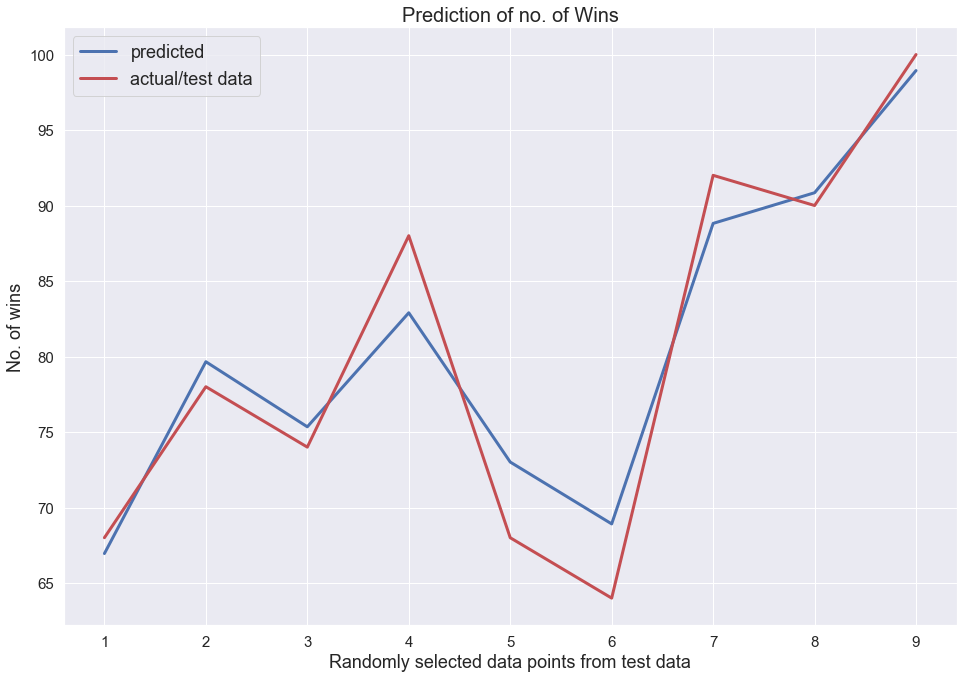

In [87]:
fig = plt.figure(figsize = (16,11))
ax = fig.add_subplot(111)
ax.plot(np.arange(1,10,1),y_pred, 'b-', linewidth = 3)
ax.plot(np.arange(1,10,1), y_test, 'r-', linewidth = 3)
plt.legend(['predicted','actual/test data'],prop={'size': 18})
plt.xticks( fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Randomly selected data points from test data', fontsize= 18)
plt.ylabel('No. of wins', fontsize= 18)
plt.title('Prediction of no. of Wins', fontsize= 20)
plt.show()

In [88]:
# Saving the best model as simple multivariate linear Regression.
import joblib

joblib.dump(lr, 'lr_bassball_pred.obj')
print('Model successfully saved.')

Model successfully saved.
